In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

In [2]:
# Which calibration type to analyse.
calibType = 'defects'
# This cell should be edited to match the data to be inspected.
afwDisplay.setDefaultBackend("astrowidgets")
cameraName = 'LATISS'
verifyCollection = 'u/czw/DM-28920/verifyDefect.20210720a'

/home/czw/.local/lib/python3.8/site-packages/ginga/cmap.py:13317: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  for name in _cm.cmap_d:


In [3]:
# Get butler and camera
butler = dB.Butler("/repo/main/", collections=[verifyCollection])
camera = butler.get('camera', instrument=cameraName)

In [4]:
# Get Run Statistics
runStats = butler.get('verifyDefectStats', instrument=cameraName)
runSuccess = runStats.pop('SUCCESS')

In [5]:
# IW = astrowidgets.ImageWidget(image_width=1000, image_height=1000)
display = afwDisplay.Display(dims=(1000, 1000))
display.embed()

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

In [6]:
# Defects are on disk as a list, but an image is more useful
calib = butler.get(calibType, instrument=cameraName, detector=0)
print(calib.getMetadata().toDict())
realization = afwImage.MaskedImageI(4072, 4000)
calib.maskPixels(realization)
calibArray = realization.getMask().getArray()

{'OBSTYPE': 'defects', 'defects_SCHEMA': '', 'defects_VERSION': 2.0, 'INSTRUME': 'LATISS', 'RAFTNAME': 'RXX', 'SLOTNAME': 'S00', 'DETECTOR': 0, 'DET_NAME': 'RXX_S00', 'DET_SER': 'ITL-3800C-098', 'FILTER': None, 'CALIB_ID': 'instrument=LATISS raftName=RXX detectorName=RXX_S00 calibDate=2021-07-20T18:13:03.426815', 'CALIBDATE': '2021-07-20T18:13:03.426815', 'CALIB_CREATION_DATE': '2021-07-20', 'CALIB_CREATION_TIME': '18:13:03.426815'}


In [7]:
# Get simple stats
q25, q50, q75 = np.percentile(calibArray.flatten(), [25, 50, 75])
sigma = 0.74 * (q75 - q25)
print(f"Median: {q50}   Stdev: {sigma}")
display.mtv(realization.getMask())

Median: 0.0   Stdev: 0.0


In [8]:
# This block allows the residual images to be scanned for concerns.
blinkResiduals = True
if blinkResiduals:
    continueDisplay = True
    skipNumber = 0
    for exposureId, stats in runStats.items():
        if skipNumber > 0:
            skipNumber -= 1
            continue
        
        # TODO: support multi-detector
        detId = 0
        residual = butler.get('verifyDefectProc', instrument=cameraName, exposure=exposureId, detector=detId)
        detStats = butler.get('verifyDefectDetStats', instrument=cameraName, exposure=exposureId, detector=detId)

        display.mtv(residual)    
        continueDisplay, skipNumber = utils.interactiveBlock(f"{exposureId} {detId}", detStats)
        if continueDisplay is False:
            break

2021012000020 0 Continue? [c, q, p, #]c
2021012000032 0 Continue? [c, q, p, #]c
2021012000037 0 Continue? [c, q, p, #]q


/home/czw/dev/DM-28920/cp_verify/python/lsst/cp/verify/notebooks/utils.py:280: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ampNames, rotation=45, rotation_mode='anchor', ha='right')


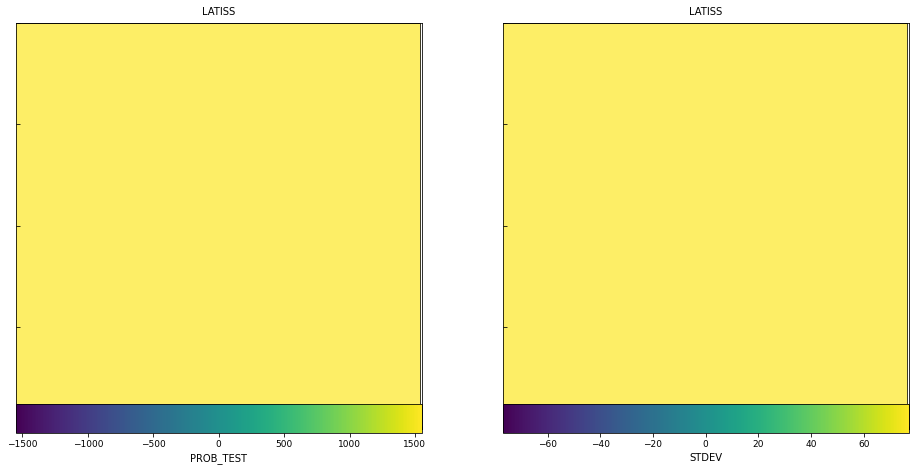

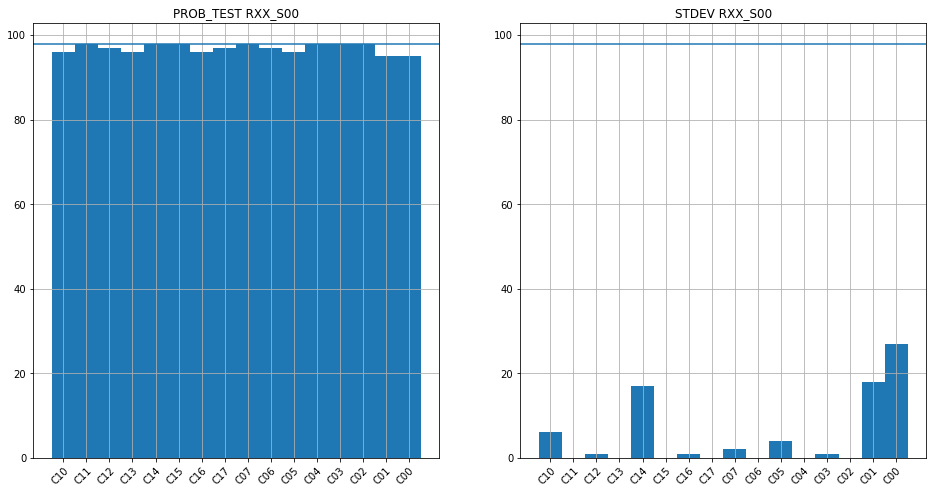

In [9]:
utils.plotFailures(runStats, camera, scaleFactor=8)

In [10]:
config = butler.get('isr_config')
config.toDict()

{'saveMetadata': True,
 'datasetType': 'raw',
 'fallbackFilterName': None,
 'useFallbackDate': False,
 'expectWcs': True,
 'fwhm': 1.0,
 'qa': {'saveStats': True,
  'flatness': {'meshX': 256,
   'meshY': 256,
   'doClip': True,
   'clipSigma': 3.0,
   'nIter': 3},
  'doWriteOss': False,
  'doThumbnailOss': False,
  'doWriteFlattened': False,
  'doThumbnailFlattened': False,
  'thumbnailBinning': 4,
  'thumbnailStdev': 3.0,
  'thumbnailRange': 5.0,
  'thumbnailQ': 20.0,
  'thumbnailSatBorder': 2},
 'doConvertIntToFloat': True,
 'doSaturation': True,
 'saturatedMaskName': 'SAT',
 'saturation': nan,
 'growSaturationFootprintSize': 0,
 'doSuspect': False,
 'suspectMaskName': 'SUSPECT',
 'numEdgeSuspect': 0,
 'edgeMaskLevel': 'DETECTOR',
 'doSetBadRegions': True,
 'badStatistic': 'MEANCLIP',
 'doOverscan': True,
 'overscan': {'fitType': 'MEDIAN_PER_ROW',
  'order': 1,
  'numSigmaClip': 3.0,
  'maskPlanes': ['SAT'],
  'overscanIsInt': True},
 'overscanFitType': 'MEDIAN',
 'overscanOrder': 1,

In [11]:
runStats

{2021012000020: {'FAILURES': ['RXX_S00 C00 PROB_TEST',
   'RXX_S00 C01 PROB_TEST',
   'RXX_S00 C02 PROB_TEST',
   'RXX_S00 C03 PROB_TEST',
   'RXX_S00 C04 PROB_TEST',
   'RXX_S00 C05 PROB_TEST',
   'RXX_S00 C06 PROB_TEST',
   'RXX_S00 C07 PROB_TEST',
   'RXX_S00 C10 PROB_TEST',
   'RXX_S00 C11 PROB_TEST',
   'RXX_S00 C12 PROB_TEST',
   'RXX_S00 C13 PROB_TEST',
   'RXX_S00 C14 PROB_TEST',
   'RXX_S00 C15 PROB_TEST',
   'RXX_S00 C16 PROB_TEST',
   'RXX_S00 C17 PROB_TEST']},
 2021012000032: {'FAILURES': ['RXX_S00 C00 PROB_TEST',
   'RXX_S00 C01 PROB_TEST',
   'RXX_S00 C02 PROB_TEST',
   'RXX_S00 C03 PROB_TEST',
   'RXX_S00 C04 PROB_TEST',
   'RXX_S00 C05 PROB_TEST',
   'RXX_S00 C06 PROB_TEST',
   'RXX_S00 C07 PROB_TEST',
   'RXX_S00 C10 PROB_TEST',
   'RXX_S00 C11 PROB_TEST',
   'RXX_S00 C12 PROB_TEST',
   'RXX_S00 C13 PROB_TEST',
   'RXX_S00 C14 PROB_TEST',
   'RXX_S00 C15 PROB_TEST',
   'RXX_S00 C16 PROB_TEST',
   'RXX_S00 C17 PROB_TEST']},
 2021012000037: {'FAILURES': ['RXX_S00 C00 PRO

In [12]:
print(len(runStats))

98


In [8]:
print(calib)

TypeError: __str__() takes 1 positional argument but 2 were given